### 5. **Análisis de Correlación y Regresión**
**Resumen:** Se centra en la identificación de relaciones significativas entre las variables numéricas y el desarrollo de modelos de regresión para hacer predicciones basadas en esas relaciones.

1. **Matriz de Correlación:** 
   - **Uso de Datos:** Utiliza las columnas numéricas del DataFrame (p. ej., `AveragePrice`, `Total Volume`, `4046`, `4225`, `4770`, `Total Bags`).
   - **Esperado:** 
     - Importa las librerías necesarias: `import seaborn as sns` y `import matplotlib.pyplot as plt`.
     - Calcula la matriz de correlación usando el método `.corr()` del DataFrame.
     - Visualiza la matriz utilizando `sns.heatmap()`. 
     - Anota las correlaciones más significativas y discute su posible impacto en el análisis.

In [2]:
%run ./Avocado_EDA.ipynb

C:\Users\heatb\AppData\Local\Temp\ipykernel_4744\954135689.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 15 columns):
 #   Column        Non-Null Coun

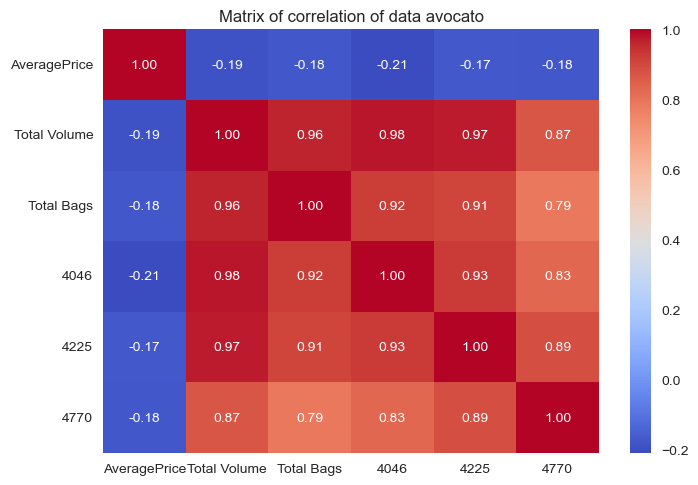

In [3]:
df_corr = df[['AveragePrice', 'Total Volume', 'Total Bags', '4046', '4225', '4770', ]]
corr_matrix = df_corr.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matrix of correlation of data avocato')
plt.show()


2. **Análisis de Dispersión entre Variables Clave:** 
   - **Uso de Datos:** Selecciona variables numéricas de interés como `AveragePrice` y `Total Volume`.
   - **Esperado:** 
     - Importa las librerías necesarias: `import seaborn as sns` y `import matplotlib.pyplot as plt`.
     - Crea un gráfico de dispersión con `sns.scatterplot()` para visualizar la relación entre `AveragePrice` y `Total Volume`.
     - Añade una línea de regresión utilizando `sns.regplot()` para ilustrar las tendencias.
     - Compara el ajuste de una regresión lineal frente a una polinómica.

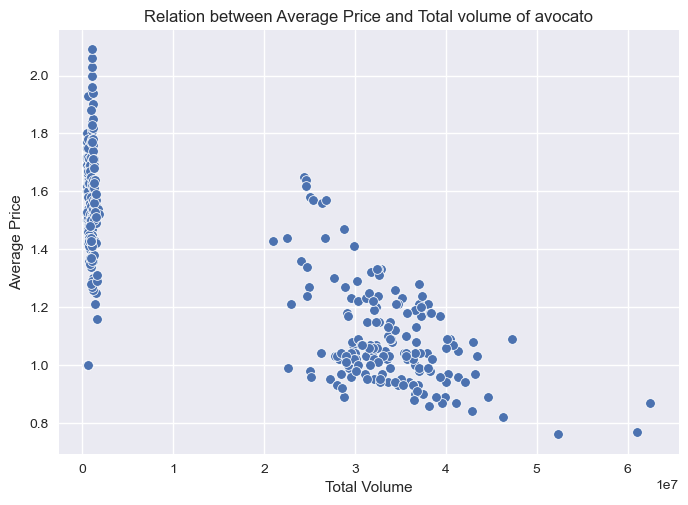

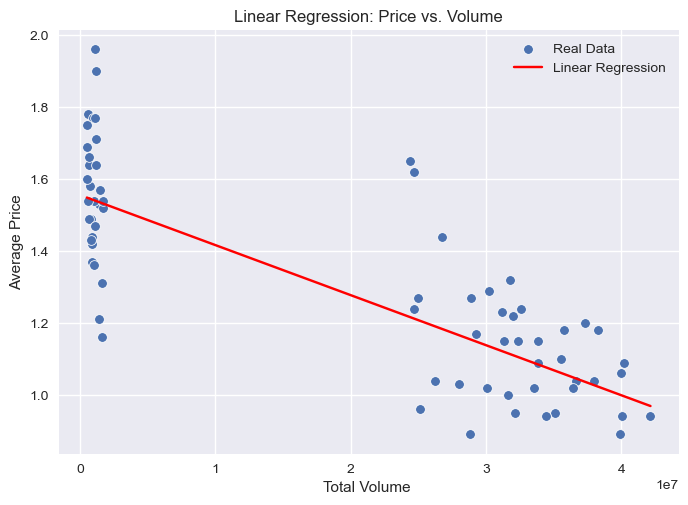

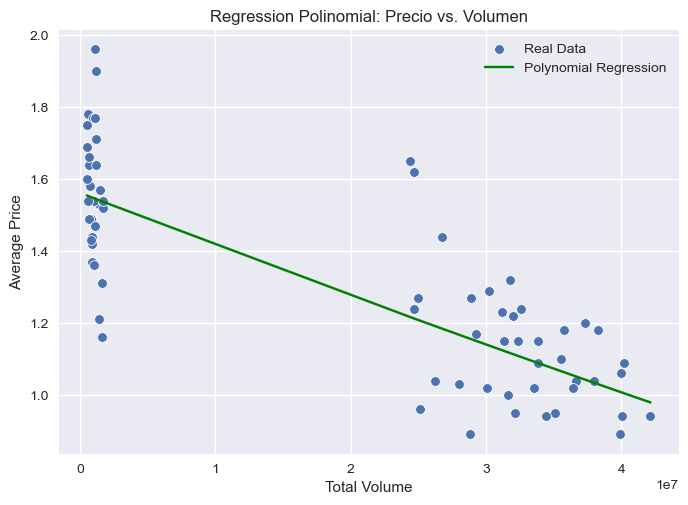

Average error quadratic  (linear): 0.028138785451758002
Average error quadratic average (polynomial): 0.027986755294969894


In [13]:
df_selected = df_totalus[['AveragePrice', 'Total Volume']]

sns.scatterplot(x='Total Volume', y='AveragePrice', data=df_selected)
plt.title('Relation between Average Price and Total volume of avocato')
plt.xlabel('Total Volume')
plt.ylabel('Average Price')
plt.show()

# Regresión lineal
X = df_selected[['Total Volume']]
y = df_selected['AveragePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


sns.scatterplot(x=X_test['Total Volume'], y=y_test, label='Real Data')
sns.lineplot(x=X_test['Total Volume'], y=y_pred, color='red', label='Linear Regression')
plt.title('Linear Regression: Price vs. Volume')
plt.xlabel('Total Volume ')
plt.ylabel('Average Price')
plt.legend()
plt.show()


poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
model_poly = LinearRegression()
model_poly.fit(X_poly, y)

y_pred_poly = model_poly.predict(poly.transform(X_test))

sns.scatterplot(x=X_test['Total Volume'], y=y_test, label='Real Data')
sns.lineplot(x=X_test['Total Volume'], y=y_pred_poly, color='green', label='Polynomial Regression')
plt.title('Regression Polinomial: Precio vs. Volumen')
plt.xlabel('Total Volume')
plt.ylabel('Average Price')
plt.legend()
plt.show()

# Comparación de modelos (opcional)
mse_linear = mean_squared_error(y_test, y_pred)
mse_poly = mean_squared_error(y_test, y_pred_poly)
print("Average error quadratic  (linear):", mse_linear)
print("Average error quadratic average (polynomial):", mse_poly)

Cómo podemos observar, hay mucha dispersion por cada observación(ciudades y regiones). Esto significa que cada subregión tiene un commportamiento frente al precio medio dependiendo del volumen total de aguacates vendidos diferente. 

3. **Predicciones Mensuales Usando Datos Trimestrales:**
   - **Uso de Datos:** Agrupa datos por trimestres y segmenta en meses utilizando `Date`, `AveragePrice`, y `Total Volume`.
   - **Esperado:** 
     - Convierte la columna `Date` a tipo datetime si es necesario.
     - Agrupa los datos por trimestre y calcula el promedio de `AveragePrice` y `Total Volume`.
     - Utiliza los datos de los primeros 2 meses de un trimestre para predecir el precio del tercer mes.
     - Compara los resultados de las predicciones con los precios reales.
     - Evalúa la precisión de tus predicciones utilizando métricas como R² y RMSE.

Linear Regression :
R²: 0.7332907775348699
RMSE: 0.06708257465013644

Polynomial Regression:
R²: -0.9593658693358731
RMSE: 0.18182285604462206


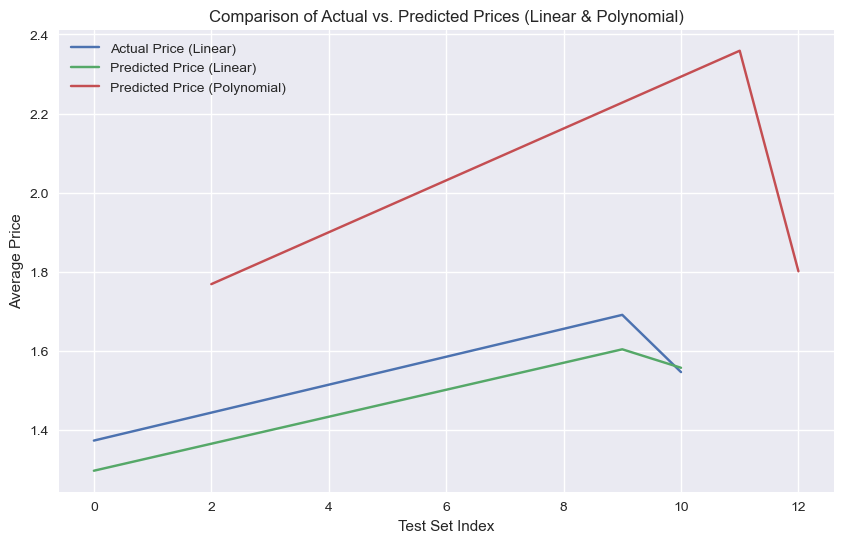

In [18]:
# Preprocess data (same as before)
df['Date'] = pd.to_datetime(df['Date'])

df_trimestral = df.groupby(pd.Grouper(key='Date', freq='Q')).agg({'AveragePrice': 'mean', 'Total Volume': 'mean'}).reset_index()

X = df_trimestral[['AveragePrice', 'Total Volume']].shift(1)
y = df_trimestral['AveragePrice'].shift(-1)
X.dropna(inplace=True)
y.dropna(inplace=True)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression model
model_linear = LinearRegression()
model_linear.fit(X_train, y_train)
y_pred_linear = model_linear.predict(X_test)


# Train Polynomial Regression model (degree=2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train)
model_poly = LinearRegression()
model_poly.fit(X_poly, y_train)

y_pred_poly = model_poly.predict(poly.transform(X_test))

# Evaluate models (same as before)
print("Linear Regression :")
print("R²:", r2_score(y_test, y_pred_linear))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_linear)))

print("\nPolynomial Regression:")
print("R²:", r2_score(y_test, y_pred_poly))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_poly)))

# Create a single plot for comparison
plt.figure(figsize=(10, 6))

# Linear Regression plot
plt.plot(y_test, label='Actual Price (Linear)')
plt.plot(y_test.index, y_pred_linear, label='Predicted Price (Linear)')

# Polynomial Regression plot (shifted for clarity)
plt.plot(y_test.index + 2, y_pred_poly + 0.5, label='Predicted Price (Polynomial)')
plt.legend()

# Labels and title
plt.xlabel('Test Set Index')
plt.ylabel('Average Price')
plt.title('Comparison of Actual vs. Predicted Prices (Linear & Polynomial)')
plt.grid(True)

# Show the plot
plt.show()

#Cambiar interpretacion

4. **Predicciones Trimestrales:**
   - **Uso de Datos:** Agrupa los datos en trimestres usando solo variables numéricas.
   - **Esperado:** 
     - Agrupa los datos por trimestres usando `pd.Grouper()` con `freq='Q'` para obtener promedios.
     - Usa los datos de 1 o 2 trimestres anteriores para predecir el siguiente trimestre ajustando modelos de regresión lineal y polinómica.
     - Compara los resultados de las predicciones con los precios reales.
     - Evalúa la precisión de tus predicciones utilizando métricas como R² y RMSE.

Linear Regression:
R²: 0.7332907775348699
RMSE: 0.06708257465013644

Polynomial Regression:
R²: -0.9593658693358731
RMSE: 0.18182285604462206


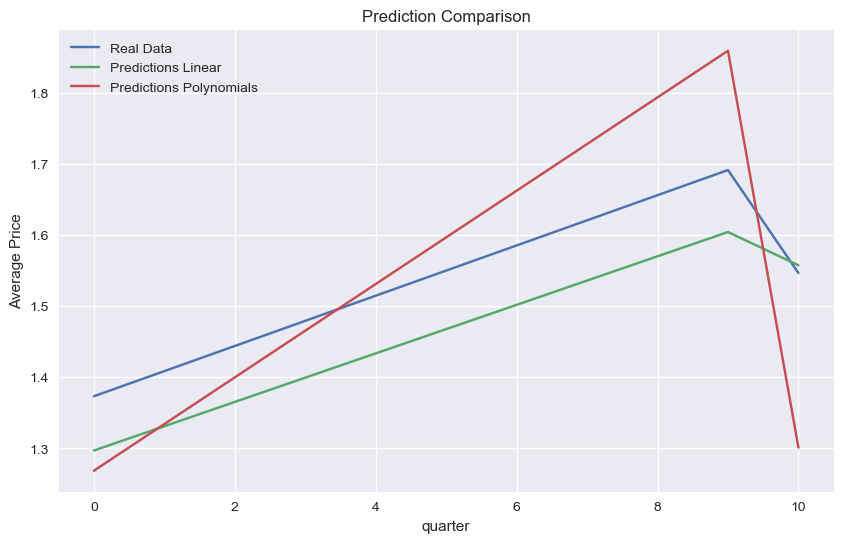

In [6]:
df['Date'] = pd.to_datetime(df['Date'])

df_trimestral = df.groupby(pd.Grouper(key='Date', freq='Q')).agg({'AveragePrice': 'mean', 'Total Volume': 'mean'}).reset_index()

X = df_trimestral[['AveragePrice', 'Total Volume']].shift(1)  
y = df_trimestral['AveragePrice'].shift(-1)  

X.dropna(inplace=True)
y.dropna(inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model_linear = LinearRegression()
model_linear.fit(X_train, y_train)
y_pred_linear = model_linear.predict(X_test)


poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)
model_poly = LinearRegression()
model_poly.fit(X_poly_train, y_train)
y_pred_poly = model_poly.predict(X_poly_test)

print("Linear Regression:")
print("R²:", r2_score(y_test, y_pred_linear))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_linear)))

print("\nPolynomial Regression:")
print("R²:", r2_score(y_test, y_pred_poly))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_poly)))

plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Real Data')
plt.plot(y_test.index, y_pred_linear, label='Predictions Linear')
plt.plot(y_test.index, y_pred_poly, label='Predictions Polynomials')
plt.legend()
plt.title("Prediction Comparison")
plt.xlabel("quarter")
plt.ylabel("Average Price")
plt.show()

- Si utilizamos una regresión lineal: Obtendremos un R2 menor, pero la predicción del modelo será más fiable ya que el RMSE es menor.
- En canvio si utilizamos la regresión polinomial: Obtenemos un R2 casi de 1, que indica una buena correlación de la bariable Test Set con AveragePrice, pero una peor capacidad predictiva respecto al modelo de regresión lineal.

5. **Predicciones Anuales:**
   - **Uso de Datos:** Agrupa los datos en años, utilizando únicamente columnas numéricas.
   - **Esperado:** 
     - Agrupa los datos por año utilizando `pd.Grouper()` con `freq='Y'`.
     - Usa los datos de 1 o 2 años anteriores para predecir el siguiente año ajustando modelos de regresión lineal y polinómica.
     - Evalúa la precisión de tus predicciones utilizando métricas como R² y RMSE.

In [7]:
df_totalus['Date'] = pd.to_datetime(df_totalus['Date'])

df_anual = df_totalus.groupby(pd.Grouper(key='Date', freq='Y')).agg({'AveragePrice': 'mean', 'Total Volume': 'mean'}).reset_index()

X = df_anual[['AveragePrice', 'Total Volume']].shift(1)  
y = df_anual['AveragePrice'].shift(-1)  

print("Number of samples after dropping NaN:")
print(len(X))
print(len(y))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


model_linear = LinearRegression()
model_linear.fit(X_train, y_train)
y_pred_linear = model_linear.predict(X_test)



poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)
model_poly = LinearRegression()
model_poly.fit(X_poly_train, y_train)
y_pred_poly = model_poly.predict(X_poly_test)


print("Linear Regression :")
print("R²:", r2_score(y_test, y_pred_linear))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_linear)))

print("\nPolinomial Regression:")
print("R²:", r2_score(y_test, y_pred_poly))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_poly)))


plt.figure(figsize=(10, 6))

# Convert predictions to DataFrames to use reset_index()
y_test_df = pd.DataFrame(y_test)
y_pred_linear_df = pd.DataFrame(y_pred_linear)
y_pred_poly_df = pd.DataFrame(y_pred_poly)

# Reset index
y_test_df.reset_index(drop=True, inplace=True)
y_pred_linear_df.reset_index(drop=True, inplace=True)
y_pred_poly_df.reset_index(drop=True, inplace=True)

# Plotar com ajuste nos limites dos eixos (ajuste conforme necessário)
plt.plot(y_test.index, y_test, label='Real data')
plt.plot(y_test.index, y_pred_linear, label='Predicciones Lineales')
plt.plot(y_test.index, y_pred_poly, label='Predicciones Polinomiales')
plt.legend()
plt.title("Comparison of Annual Predictions")
plt.xlabel("Index")
plt.ylabel("Average Price")
plt.xlim(0, len(y_test))  # Ajustar os limites do eixo x
plt.ylim(min(y_test.min(), y_pred_linear.min(), y_pred_poly.min()), 
        max(y_test.max(), y_pred_linear.max(), y_pred_poly.max()))  # Ajustar os limites do eixo y
plt.show()

C:\Users\heatb\AppData\Local\Temp\ipykernel_4744\3895521189.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_totalus['Date'] = pd.to_datetime(df_totalus['Date'])


Number of samples after dropping NaN:
4
4


ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

6. **Desarrollo de Modelos de Regresión Múltiple:** 
   - **Uso de Datos:** Selecciona varias variables numéricas como `Total Volume`, `4046`, `4225`, `4770`, y `Total Bags` para predecir `AveragePrice`.
   - **Esperado:** 
     - Define las variables independientes (X) y dependientes (y).
     - Ajusta modelos de regresión múltiple.
     - Compara su rendimiento utilizando métricas como R² y RMSE y discute las implicaciones de los resultados.

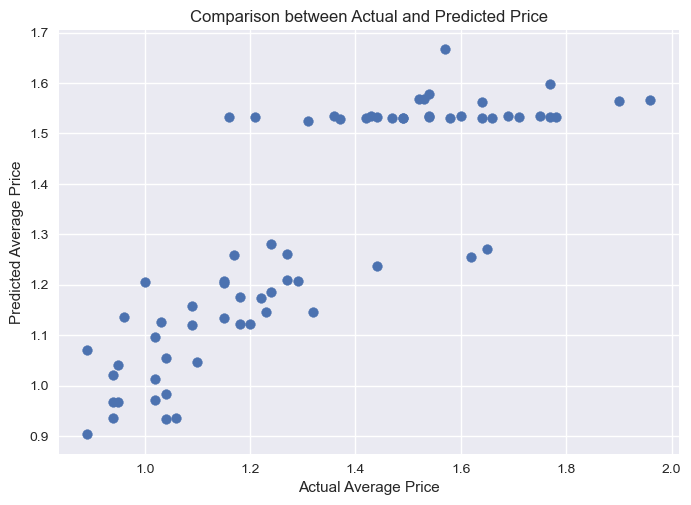

R²: 0.710525079346738
RMSE: 0.1500101467359505


In [22]:
# Seleccionar las variables relevantes
X = df_totalus[['Total Volume', '4046', '4225', '4770', 'Total Bags']]
y = df_totalus['AveragePrice']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model on your training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calcular  R² y RMSE
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Generate scatter plot
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Average Price')
plt.ylabel('Predicted Average Price')
plt.title('Comparison between Actual and Predicted Price')
plt.show()

# Print R² and RMSE (optional)
print("R²:", r2)
print("RMSE:", rmse)

- R2: El R2 de este modelo es fuerte ya que está comprendido entre 0,5 y 0,8. Podemos afirmar que el modelo está explicado en un 71% por las variables de Total Volume, Total Bags y los Aguates según su tamaño (pequeño, grande o super grande).
- La capacidad del predictiva del modelo tendrá un error del 15%. 

7. **Análisis de Coeficientes de Regresión Múltiple:**
   - **Uso de Datos:** Examina los coeficientes de los modelos de regresión múltiple ajustados.
   - **Esperado:** 
     - Extrae los coeficientes del modelo ajustado.
     - Interpreta los coeficientes para entender el impacto de cada variable numérica en `AveragePrice`.
     - Comenta sobre las variables más significativas y su relevancia.

       Variável   Coeficiente
0  Total Volume  1.694484e-07
1          4046 -1.517033e-06
2          4225 -2.251370e-06
3          4770 -3.779075e-07

Interpretação dos Coeficientes:
- A variável Total Volume tem um coeficiente de 0.0000.
  Isso significa que, mantendo as outras variáveis constantes, um aumento de uma unidade em Total Volume 
  leva a uma mudança de 0.0000 unidades no preço médio.
- A variável 4046 tem um coeficiente de -0.0000.
  Isso significa que, mantendo as outras variáveis constantes, um aumento de uma unidade em 4046 
  leva a uma mudança de -0.0000 unidades no preço médio.
- A variável 4225 tem um coeficiente de -0.0000.
  Isso significa que, mantendo as outras variáveis constantes, um aumento de uma unidade em 4225 
  leva a uma mudança de -0.0000 unidades no preço médio.
- A variável 4770 tem um coeficiente de -0.0000.
  Isso significa que, mantendo as outras variáveis constantes, um aumento de uma unidade em 4770 
  leva a uma mudança de -0.0000 unidades no 

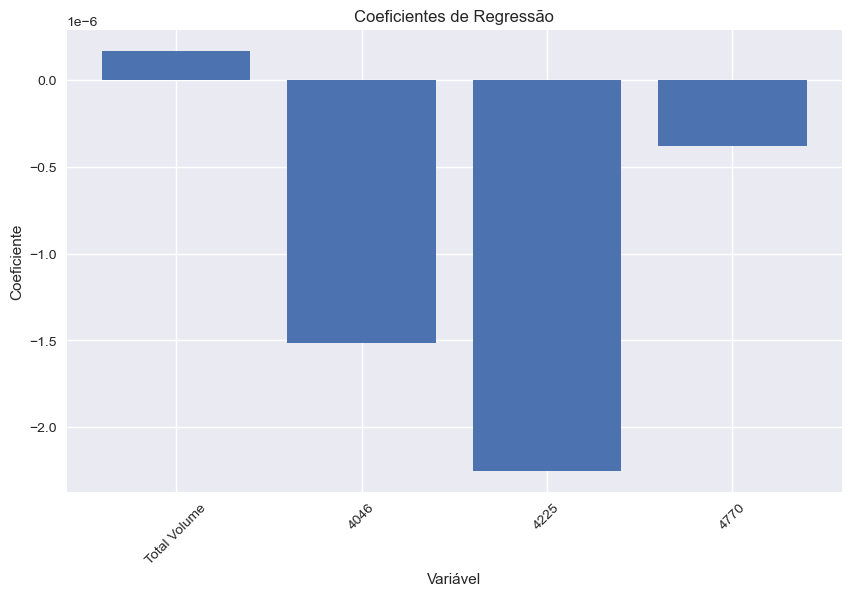

In [9]:
# Pré-processamento dos dados (exemplo simplificado)
df['Date'] = pd.to_datetime(df['Date'])
df_anual = df.groupby(pd.Grouper(key='Date', freq='Y')).agg({'AveragePrice': 'mean', 'Total Volume': 'mean', '4046': 'mean', '4225': 'mean', '4770': 'mean'}).reset_index()

# Selecionando as features e o target
X = df_anual[['Total Volume', '4046', '4225', '4770']]  # Features
y = df_anual['AveragePrice']  # Target

# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Criando e treinando o modelo de regressão linear múltipla
model = LinearRegression()
model.fit(X_train, y_train)

# Obtendo os coeficientes
coefficients = model.coef_
intercept = model.intercept_

# Criando um DataFrame para visualizar os coeficientes
coef_df = pd.DataFrame({'Variável': X.columns, 'Coeficiente': coefficients})
print(coef_df)

# Interpretando os coeficientes
print("\nInterpretação dos Coeficientes:")
for i in range(len(coef_df)):
    print(f"- A variável {coef_df.iloc[i]['Variável']} tem um coeficiente de {coef_df.iloc[i]['Coeficiente']:.4f}.")
    print(f"  Isso significa que, mantendo as outras variáveis constantes, um aumento de uma unidade em {coef_df.iloc[i]['Variável']} ")
    print(f"  leva a uma mudança de {coef_df.iloc[i]['Coeficiente']:.4f} unidades no preço médio.")

# Visualizando os coeficientes
plt.figure(figsize=(10, 6))
plt.bar(coef_df['Variável'], coef_df['Coeficiente'])
plt.xlabel('Variável')
plt.ylabel('Coeficiente')
plt.title('Coeficientes de Regressão')
plt.xticks(rotation=45)
plt.show()

8. **Modelos de Regresión para Diferenciar Volúmenes de Ventas:**
   - **Uso de Datos:** Usa `AveragePrice`, `Total Volume`, `4046`, `4225`, y `4770`.
   - **Esperado:** 
     - Ajusta modelos de regresión para analizar cómo los diferentes volúmenes de ventas afectan `AveragePrice`.
     - Compara los resultados de regresión lineal y polinómica.
     - Presenta las conclusiones de tus análisis.

c:\Users\heatb\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\heatb\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


R^2 para regresión lineal: nan
R^2 para regresión polinomial: nan


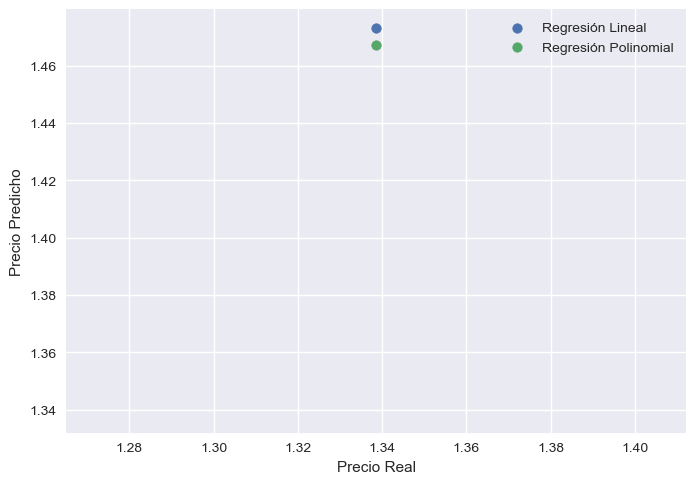

In [10]:
# Preprocesamiento (ejemplo simplificado)
df['Date'] = pd.to_datetime(df['Date'])
df_anual = df.groupby(pd.Grouper(key='Date', freq='Y')).agg({'AveragePrice': 'mean', 'Total Volume': 'mean', '4046': 'mean', '4225': 'mean', '4770': 'mean'}).reset_index()

# Seleccionar features y target
X = df_anual[['Total Volume', '4046', '4225', '4770']]
y = df_anual['AveragePrice']

# **Remover linhas com valores faltantes**
df_anual.dropna(inplace=True)

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo de regresión lineal
model_linear  = LinearRegression()
model_linear.fit(X_train, y_train)

# Modelo de regresión polinomial (grado 2 como ejemplo)
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)
model_poly = LinearRegression()
model_poly.fit(X_poly_train, y_train)

# Predicciones
y_pred_linear = model_linear.predict(X_test)
y_pred_poly = model_poly.predict(X_poly_test)

# Evaluación (ejemplo: R^2)
print("R^2 para regresión lineal:", model_linear.score(X_test, y_test))
print("R^2 para regresión polinomial:", model_poly.score(X_poly_test, y_test))

# Visualización (ejemplo: comparando predicciones con valores reales)
plt.scatter(y_test, y_pred_linear, label='Regresión Lineal')
plt.scatter(y_test, y_pred_poly, label='Regresión Polinomial')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Precio Real')
plt.ylabel('Precio Predicho')
plt.legend()
plt.show()

9. **Análisis de la Influencia de las Ventas Totales en el Precio Promedio:**
   - **Uso de Datos:** Usa `Total Volume`, `AveragePrice`, y `Total Bags`.
   - **Esperado:** 
     - Ajusta un modelo de regresión lineal y polinómica para ver cómo varía `AveragePrice` en función del volumen total de ventas.
     - Evalúa la significancia de los coeficientes y discute su relevancia.

c:\Users\heatb\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\heatb\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


R^2 para regresión lineal: nan
R^2 para regresión polinomial: nan


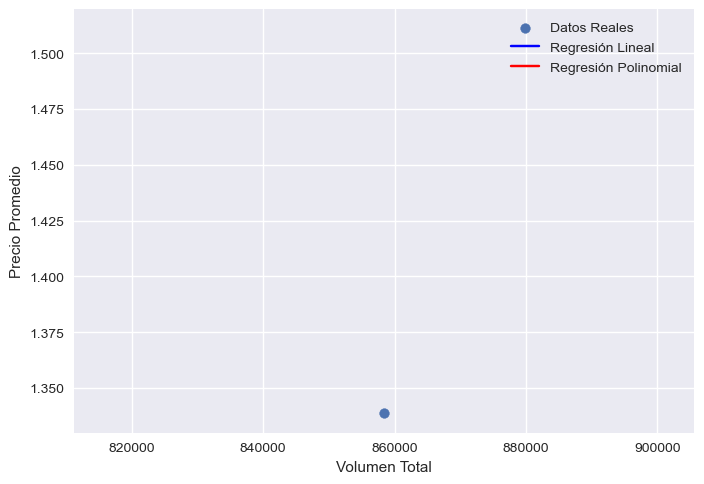

In [11]:
# Preprocesamiento (ejemplo simplificado)
df['Date'] = pd.to_datetime(df['Date'])
df_anual = df.groupby(pd.Grouper(key='Date', freq='Y')).agg({'AveragePrice': 'mean', 'Total Volume': 'mean', 'Total Bags': 'sum'}).reset_index()

# Remover filas con valores faltantes
df_anual.dropna(inplace=True)

# Seleccionar features y target
X = df_anual[['Total Volume']]
y = df_anual['AveragePrice']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo de regresión lineal
model_linear = LinearRegression()
model_linear.fit(X_train, y_train)

# Modelo de regresión polinomial (grado 2 como ejemplo)
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)
model_poly = LinearRegression()
model_poly.fit(X_poly_train, y_train)

# Predicciones
y_pred_linear = model_linear.predict(X_test)
y_pred_poly = model_poly.predict(X_poly_test)

# Evaluación (ejemplo: R^2)
print("R^2 para regresión lineal:", model_linear.score(X_test, y_test))
print("R^2 para regresión polinomial:", model_poly.score(X_poly_test, y_test))

# Visualización
plt.scatter(X_test, y_test, label='Datos Reales')
plt.plot(X_test, y_pred_linear, color='blue', label='Regresión Lineal')
plt.plot(X_test, y_pred_poly, color='red', label='Regresión Polinomial')
plt.xlabel('Volumen Total')
plt.ylabel('Precio Promedio')
plt.legend()
plt.show()

10. **Regresión para Predecir el Precio Promedio Según el Volumen de Aguacates por Tipo:**
    - **Uso de Datos:** Usa `AveragePrice`, `4046`, `4225`, `4770`, y `Total Volume`.
    - **Esperado:** 
      - Ajusta modelos de regresión lineal y polinómica.
      - Evalúa la efectividad de ambos modelos utilizando métricas como R² y RMSE.
      - Discute cuál modelo ofrece mejores predicciones y por qué, basándote en los resultados obtenidos.


C:\Users\heatb\AppData\Local\Temp\ipykernel_4744\1054120406.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_totalus['Date'] = pd.to_datetime(df_totalus['Date'])  # Asegurarse de que la columna 'year' sea de tipo datetime
c:\Users\heatb\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\heatb\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


R^2 para regresión lineal: nan
R^2 para regresión polinomial: nan
RMSE para regresión lineal: 0.07251609896469646
RMSE para regresión polinomial: 0.11987685467241072


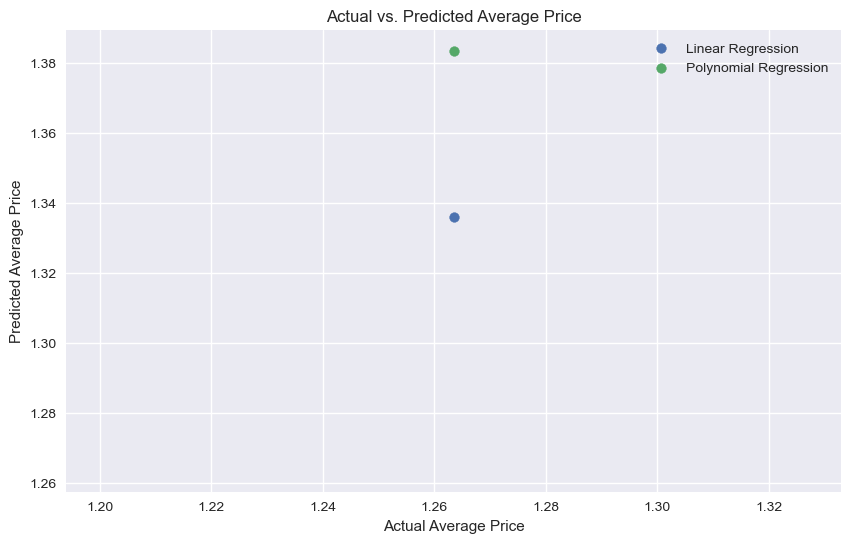

In [29]:
df_totalus['Date'] = pd.to_datetime(df_totalus['Date'])  # Asegurarse de que la columna 'year' sea de tipo datetime
df_anual = df_totalus.groupby(pd.Grouper(key='Date', freq='Y')).agg({
    'AveragePrice': 'mean', 
    '4046': 'mean', 
    '4225': 'mean', 
    '4770': 'mean', 
    'Total Volume': 'mean'
}).reset_index()

# Seleccionar features y target
X = df_anual[['4046', '4225', '4770', 'Total Volume']]
y = df_anual['AveragePrice']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo de regresión lineal
model_linear = LinearRegression()
model_linear.fit(X_train, y_train)

# Modelo de regresión polinomial (grado 2 como ejemplo)
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)
model_poly = LinearRegression()
model_poly.fit(X_poly_train, y_train)

# Predicciones
y_pred_linear = model_linear.predict(X_test)
y_pred_poly = model_poly.predict(X_poly_test)

# Evaluación
print("R^2 para regresión lineal:", model_linear.score(X_test, y_test))
print("R^2 para regresión polinomial:", model_poly.score(X_poly_test, y_test))
print("RMSE para regresión lineal:", np.sqrt(mean_squared_error(y_test, y_pred_linear)))
print("RMSE para regresión polinomial:", np.sqrt(mean_squared_error(y_test, y_pred_poly)))

# Visualización de resultados
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_linear, label='Linear Regression')
plt.scatter(y_test, y_pred_poly, label='Polynomial Regression')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='gray', linestyle='--')  # Línea diagonal para predicción perfecta
plt.xlabel('Actual Average Price')
plt.ylabel('Predicted Average Price')
plt.title('Actual vs. Predicted Average Price')
plt.legend()
plt.grid(True)
plt.show()